<a href="https://colab.research.google.com/github/tawfig2020/AIBISz/blob/master/Predict_Lead_Score_Using_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.1 MB/s eta 0:00:00
   ━━━

In [4]:
# import libraries**
import pandas as pd
import numpy as np
# import libraries**
import pandas as pd
import numpy as np

# read csv data
data= pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# init setup**
from pycaret.classification import *

# Print the columns to check for the correct target column name
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [14]:
# import libraries**
import pandas as pd
import numpy as np
# import libraries**
import pandas as pd
import numpy as np

# read csv data
data= pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')
data.head()

# init setup**
from pycaret.classification import *

# Print the columns to check for the correct target column name
print(data.columns)

# Define the target column (assuming 'Churn' is the target column)
target_column = 'Churn'

# Setup PyCaret
clf1 = setup(data, target = target_column) #Call setup() before compare_models()

# compare all models**
best_model = compare_models(sort='AUC')

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,Description,Value
0,Session id,5780
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 42)"
6,Transformed train set shape,"(4930, 42)"
7,Transformed test set shape,"(2113, 42)"
8,Numeric features,3
9,Categorical features,17


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7493,0.8360,0.7493,0.7507,0.6636,0.0962,0.1855,1.6030
svm,SVM - Linear Kernel,0.6974,0.8074,0.6974,0.7737,0.6665,0.2789,0.3273,0.7380
ridge,Ridge Classifier,0.7452,0.7800,0.7452,0.7263,0.6605,0.0867,0.1600,0.4110
knn,K Neighbors Classifier,0.7667,0.7773,0.7667,0.7603,0.7627,0.3824,0.3838,0.7210
rf,Random Forest Classifier,0.7347,0.7629,0.7347,0.5398,0.6223,0.0000,0.0000,0.9270
xgboost,Extreme Gradient Boosting,0.7347,0.7320,0.7347,0.5398,0.6223,0.0000,0.0000,0.6830
et,Extra Trees Classifier,0.7357,0.6657,0.7357,0.6398,0.6250,0.0063,0.0324,0.9820
lightgbm,Light Gradient Boosting Machine,0.7347,0.5647,0.7347,0.5398,0.6223,0.0000,0.0000,1.1420
qda,Quadratic Discriminant Analysis,0.7347,0.5058,0.7347,0.5398,0.6223,0.0000,0.0000,0.4570
nb,Naive Bayes,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.4200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [16]:
# print best_model parameters**
# print(best_model.get_all_params()) # This line causes the error. LogisticRegression doesn't have this method.
# Instead, use get_params() which is a method of the underlying scikit-learn estimator:
print(best_model.get_params())

# except for catboost you can do this:**
print(best_model)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 5780, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5780, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


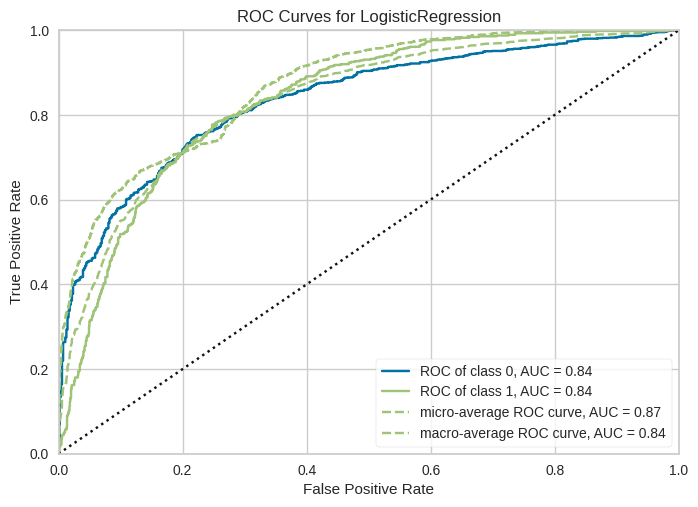

In [17]:
# AUC Plot**
plot_model(best_model, plot = 'auc')

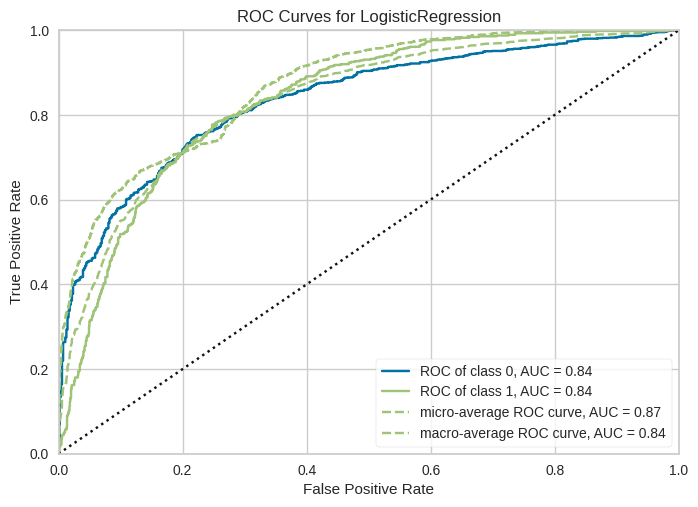

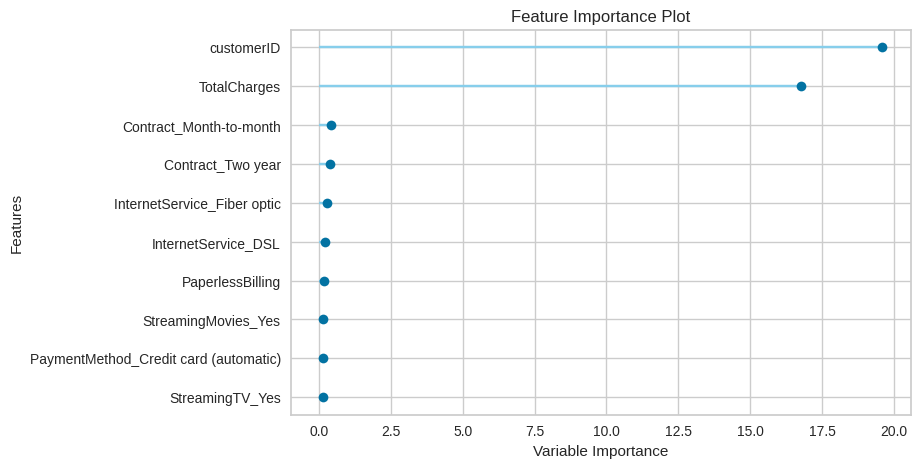

[[ 1.95873192e+01  3.04303682e-02  1.28830643e-01 -2.08673124e-02
  -1.34256702e-01 -1.95259095e-02 -3.98169106e-02 -1.19508450e-01
   7.96915395e-02  4.33040402e-02  2.86951066e-01 -2.09854781e-01
  -7.36091554e-02  1.46393532e-01 -6.92972474e-02 -7.36091554e-02
   1.41754310e-02  6.29208540e-02 -7.36091554e-02  4.73679380e-02
   2.97283470e-02 -7.36091554e-02  1.19978544e-01 -4.28822588e-02
  -7.36091554e-02  1.48001473e-01 -7.09051878e-02 -7.36091554e-02
  -7.65480828e-02  1.53644368e-01 -7.36091554e-02  4.17611261e-01
  -3.83946780e-01 -3.01773515e-02  1.67612831e-01  1.23112853e-01
   4.43729606e-02 -1.52846301e-01 -1.11523829e-02 -2.40783027e-03
   1.67697491e+01]]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=958cc9a7f86a07f600a4ad3facb19a433896db219034c126c82dfbeabc7006bb
  Stored in directory: /root/.cache/pip/wheel

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/metaestimators.py)

In [19]:
# AUC Plot**
plot_model(best_model, plot = 'auc')


# Instead of using interpret_model for Shapley Values (which is not supported for Logistic Regression),
# you can use the following alternatives to gain insights into the model:

# 1. Feature Importance:
plot_model(best_model, plot='feature')

# 2. Coefficient Analysis:
# Access the coefficients of the Logistic Regression model.
coefficients = best_model.coef_
print(coefficients)

# 3. Permutation Importance:
# This method can be used to assess feature importance for any model type.
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_model, random_state=1).fit(X, y) # Replace X and y with your data
eli5.show_weights(perm, feature_names = X.columns.tolist()) # Replace X with your data

In [20]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (120-15), 0)
    fp = np.where((y_pred==1) & (y==0), -15, 0)
    fn = np.where((y_pred==0) & (y==1), -120, 0)
    return np.sum([tp,fp,fn])

# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

,profit
Name,Profit
Display Name,Profit
Score Function,<pycaret.internal.metrics.EncodedDecodedLabels...
Scorer,"make_scorer(calculate_profit, response_method=..."
Target,pred
Args,{}
Greater is Better,True
Multiclass,True
Custom,True


In [21]:
# compare all models**
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lr,Logistic Regression,0.7493,0.8360,0.7493,0.7507,0.6636,0.0962,0.1855,0.0000,1.5740
knn,K Neighbors Classifier,0.7667,0.7773,0.7667,0.7603,0.7627,0.3824,0.3838,0.0000,0.4450
nb,Naive Bayes,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0000,0.4080
dt,Decision Tree Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0000,0.6320
svm,SVM - Linear Kernel,0.6974,0.8074,0.6974,0.7737,0.6665,0.2789,0.3273,0.0000,0.4660
ridge,Ridge Classifier,0.7452,0.7800,0.7452,0.7263,0.6605,0.0867,0.1600,0.0000,0.4730
rf,Random Forest Classifier,0.7347,0.7629,0.7347,0.5398,0.6223,0.0000,0.0000,0.0000,0.9280
qda,Quadratic Discriminant Analysis,0.7347,0.5058,0.7347,0.5398,0.6223,0.0000,0.0000,0.0000,0.4150
ada,Ada Boost Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0000,0.6980
gbc,Gradient Boosting Classifier,0.7347,0.4819,0.7347,0.5398,0.6223,0.0000,0.0000,0.0000,0.7170


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [23]:
# create copy of data
data_new = data.copy()

# Check if 'Converted' column exists before dropping
if 'Converted' in data_new.columns:
    data_new.drop('Converted', axis=1, inplace=True)
else:
    print("Column 'Converted' not found in the DataFrame.")
    # You might want to check for alternative column names here
    # For example, check for 'converted', 'CONVERETED', etc.

# generate labels using predict_model
predict_model(best_model, data=data_new, raw_score=True)

Column 'Converted' not found in the DataFrame.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
0,Logistic Regression,0.9215,0.9796,0.9215,0.9275,0.9170,0.7790,0.7963,0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score_No,prediction_score_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No,No,0.9026,0.0974
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.950001,1889.5,No,No,0.9824,0.0176
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.849998,108.15,Yes,Yes,0.1272,0.8728
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No,No,0.9838,0.0162
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.699997,151.65,Yes,No,0.6737,0.3263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.800003,1990.5,No,No,0.9676,0.0324
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.199997,7362.9,No,No,0.9764,0.0236
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No,No,0.9383,0.0617
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.400002,306.6,Yes,Yes,0.0519,0.9481
